In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [58]:
dataset = pd.read_csv('Documents/iip.csv')

In [59]:
print(dataset.shape)

(10000, 50)


In [60]:
dataset.head()

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,1,3,1,5,72,0,0,0,0,0,...,0,0,1,1,0,1,1,-1,1,1
1,2,3,1,3,144,0,0,0,0,2,...,0,0,0,1,-1,1,1,1,1,1
2,3,3,1,2,58,0,0,0,0,0,...,0,0,0,1,0,-1,1,-1,0,1
3,4,3,1,6,79,1,0,0,0,0,...,0,0,0,1,-1,1,1,1,-1,1
4,5,3,0,4,46,0,0,0,0,0,...,1,0,0,1,1,-1,0,-1,-1,1


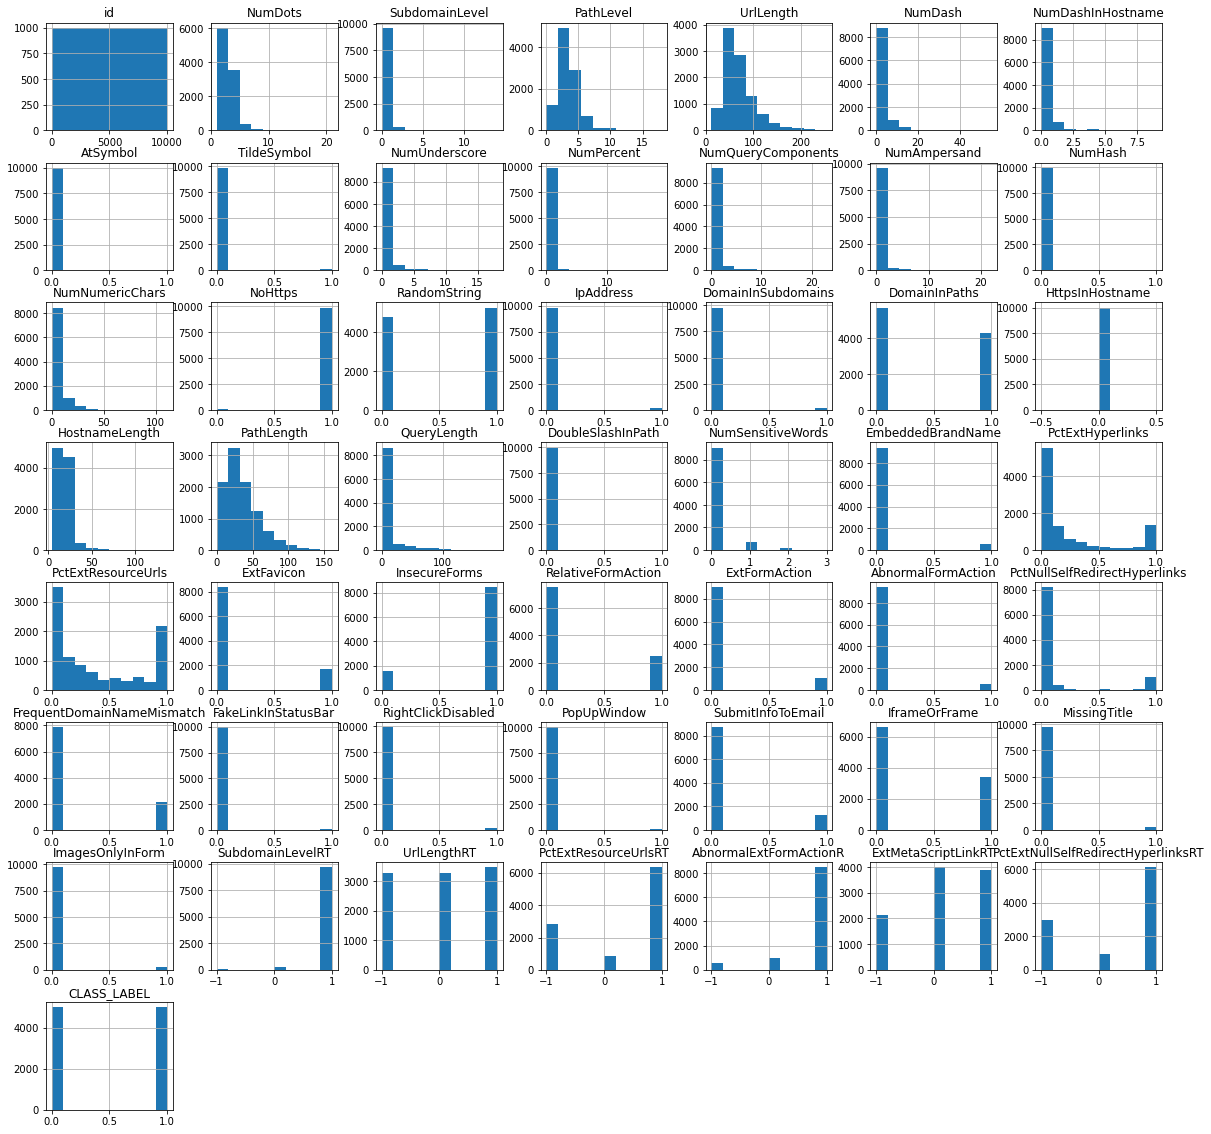

In [61]:
dataset.hist(figsize=(20,20))
plt.show()

In [62]:
dataset.isnull().sum()

dataset=dataset.drop_duplicates()
print(dataset)

         id  NumDots  SubdomainLevel  PathLevel  UrlLength  NumDash  \
0         1        3               1          5         72        0   
1         2        3               1          3        144        0   
2         3        3               1          2         58        0   
3         4        3               1          6         79        1   
4         5        3               0          4         46        0   
...     ...      ...             ...        ...        ...      ...   
9995   9996        3               1          1         50        0   
9996   9997        2               1          4         59        1   
9997   9998        2               1          4         57        0   
9998   9999        3               1          1         49        0   
9999  10000        3               1          2         52        3   

      NumDashInHostname  AtSymbol  TildeSymbol  NumUnderscore  ...  \
0                     0         0            0              0  ...   
1      

In [63]:
X = dataset.drop(columns = ['id','CLASS_LABEL'],axis=1)
y = dataset['CLASS_LABEL']


In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
X


,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,...,SubmitInfoToEmail,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT
0,3,1,5,72,0,0,0,0,0,0,...,0,0,0,1,1,0,1,1,-1,1
1,3,1,3,144,0,0,0,0,2,0,...,0,0,0,0,1,-1,1,1,1,1
2,3,1,2,58,0,0,0,0,0,0,...,0,0,0,0,1,0,-1,1,-1,0
3,3,1,6,79,1,0,0,0,0,0,...,1,0,0,0,1,-1,1,1,1,-1
4,3,0,4,46,0,0,0,0,0,0,...,0,1,0,0,1,1,-1,0,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,3,1,1,50,0,0,0,0,0,0,...,0,0,0,0,1,1,-1,1,0,1
9996,2,1,4,59,1,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,1
9997,2,1,4,57,0,0,0,0,0,0,...,0,0,0,0,1,0,1,1,0,1
9998,3,1,1,49,0,0,0,0,0,0,...,0,1,0,0,1,1,0,1,0,1


In [65]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [66]:
#linear regression
regressor = LinearRegression()
model0 = regressor.fit(X_train, y_train)

In [67]:
print('Accuracy on training set:{:.2f}'.format(regressor.score(X_train,y_train)))
print('Accuracy on test set : {:.2f}'.format(regressor.score(X_test,y_test)))

Accuracy on training set:0.70
Accuracy on test set : 0.66


In [68]:
#knn
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
model = knn.fit(X_train,y_train)
print('Accuracy on training set')
print(knn.score(X_train,y_train))
print('Accuracy on test set')
print(knn.score(X_test,y_test))

Accuracy on training set
0.913
Accuracy on test set
0.875


In [72]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(max_depth=3).fit(X_train,y_train)
print('Accuracy on training set')
print(clf.score(X_train,y_train))
print('Accuracy on test set')
print(clf.score(X_test,y_test))

Accuracy on training set
0.9445
Accuracy on test set
0.9375


In [71]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
mod = gnb.fit(X_train, y_train)
print('Accuracy on training set')
print(gnb.score(X_train,y_train))
print('Accuracy on test set')
print(gnb.score(X_test,y_test))

Accuracy on training set
0.845875
Accuracy on test set
0.8485
